ЛР1(https://sites.google.com/site/anisimovkhv/learning/iis/labrab/labrab1_4)
Выбранная предметная область: авиация и транспорт

## Задание: составить базу знаний.

# Классы


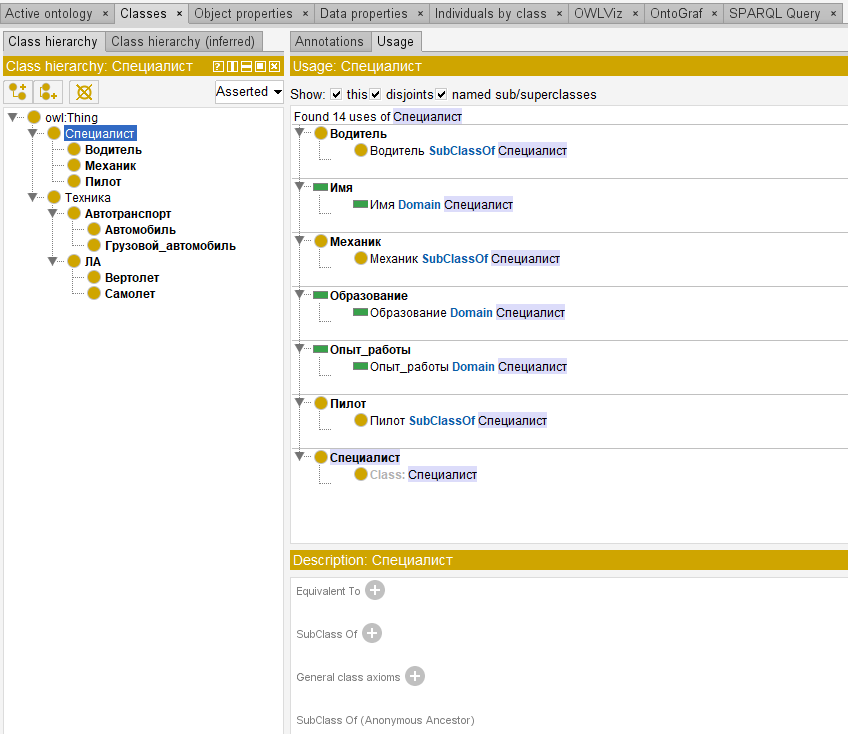

# Свойства-отношения

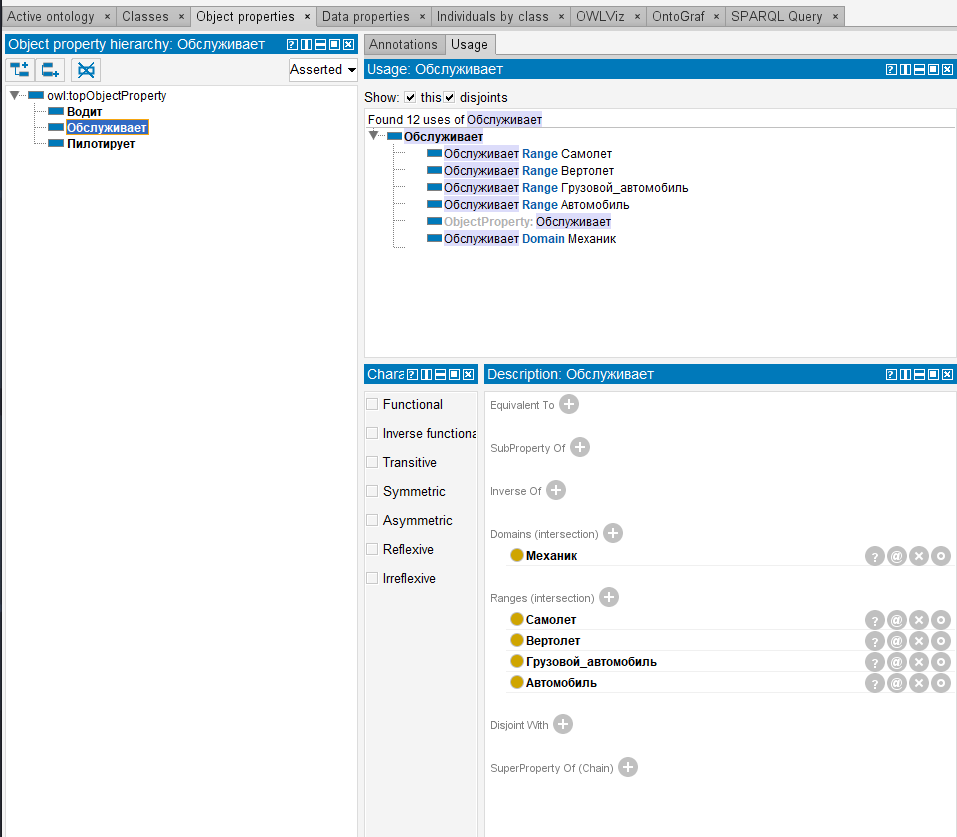

# Свойства-данные

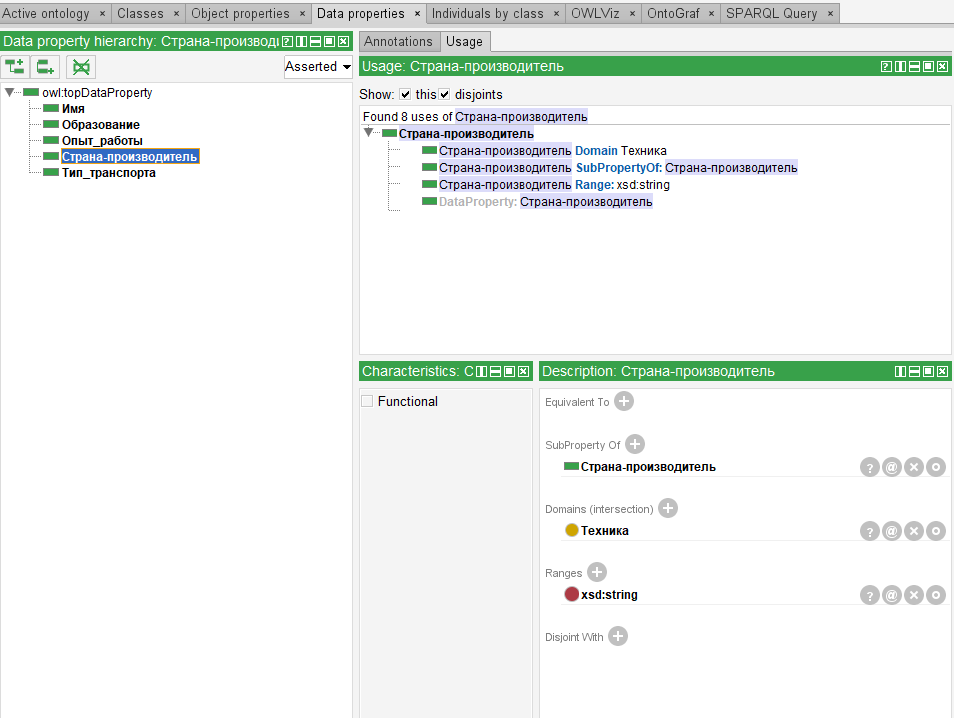

# OntoGraph

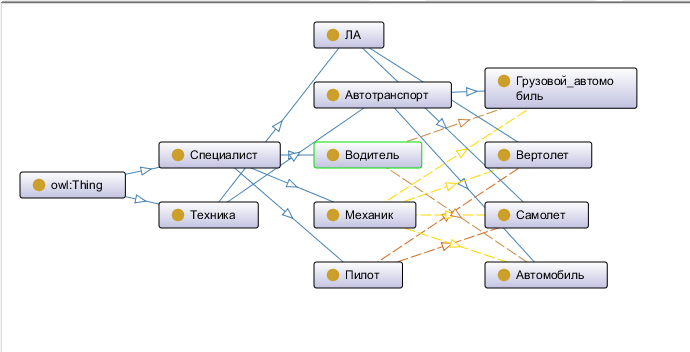

ЛР2(https://sites.google.com/site/anisimovkhv/learning/iis/labrab/labrab1_5)

# Добавление индивидов

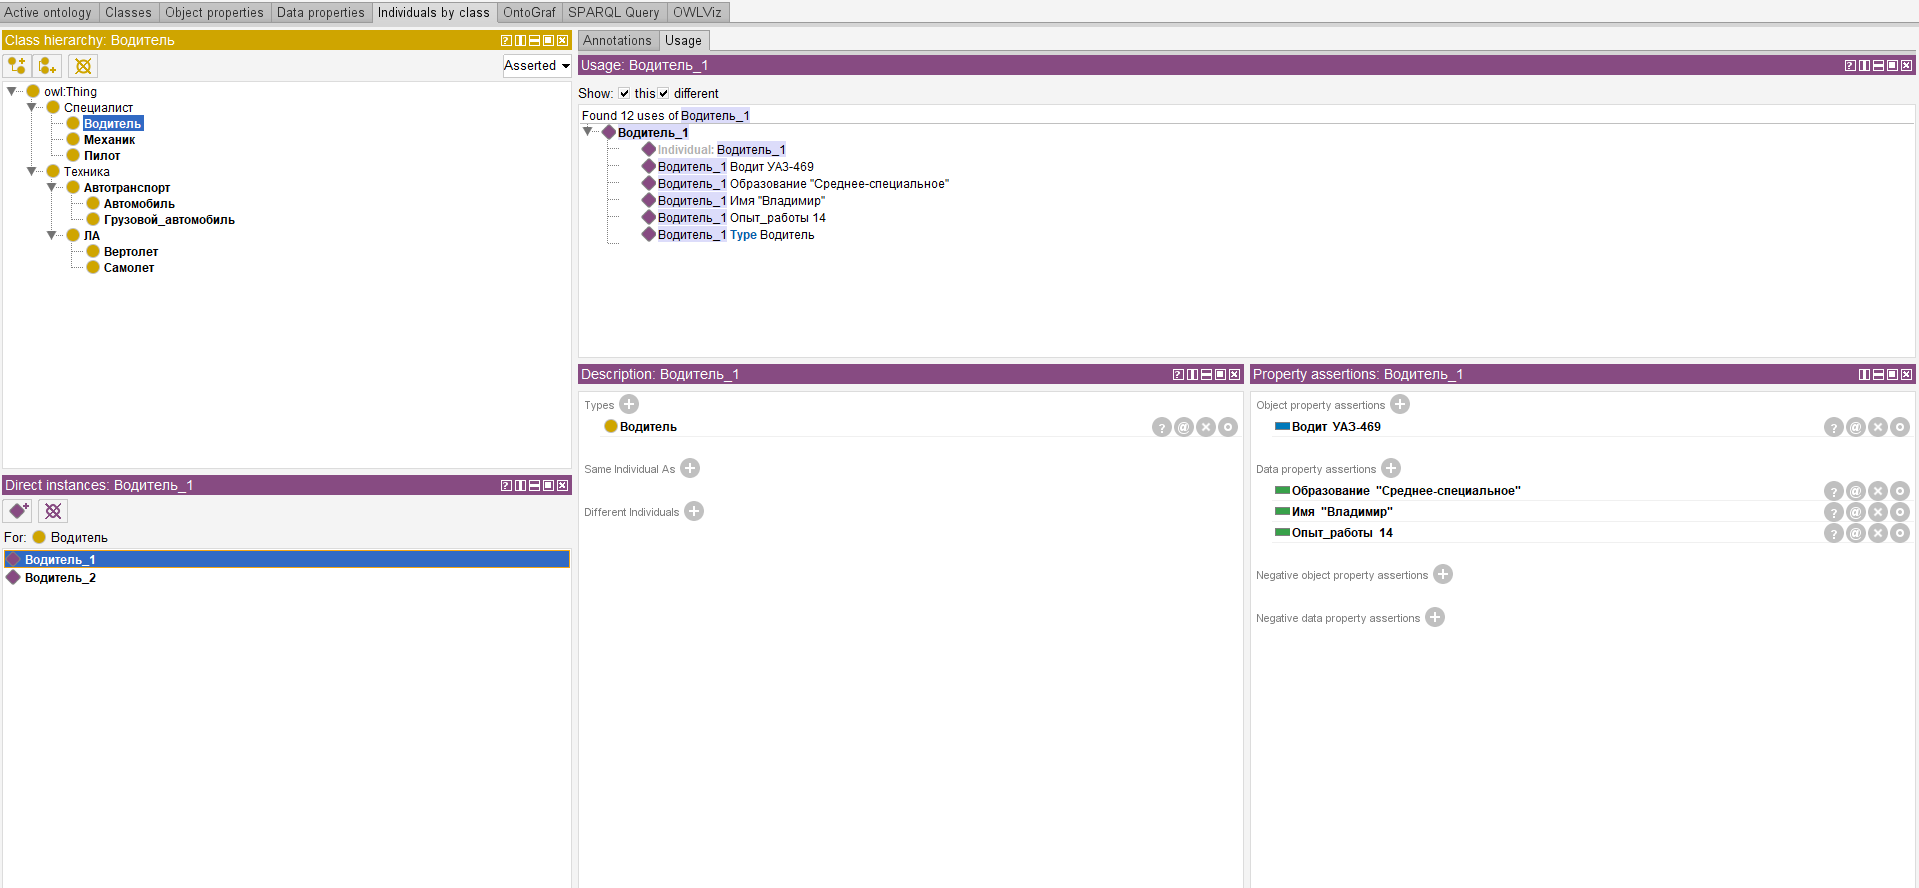

# Граф онтологии

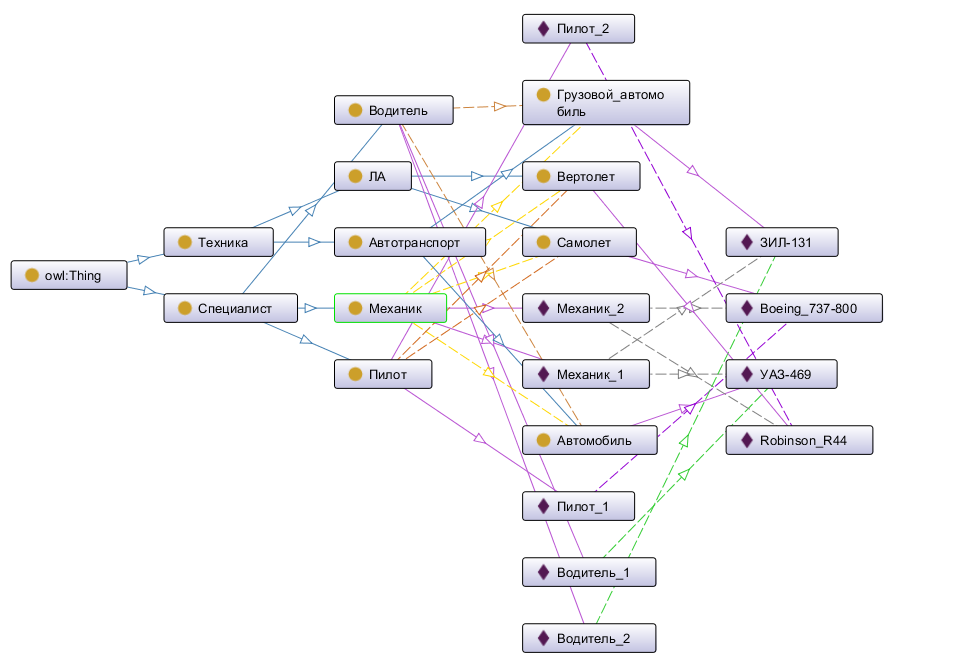

ЛР3(https://sites.google.com/site/anisimovkhv/learning/iis/labrab/labrab1_6)

# Запросы

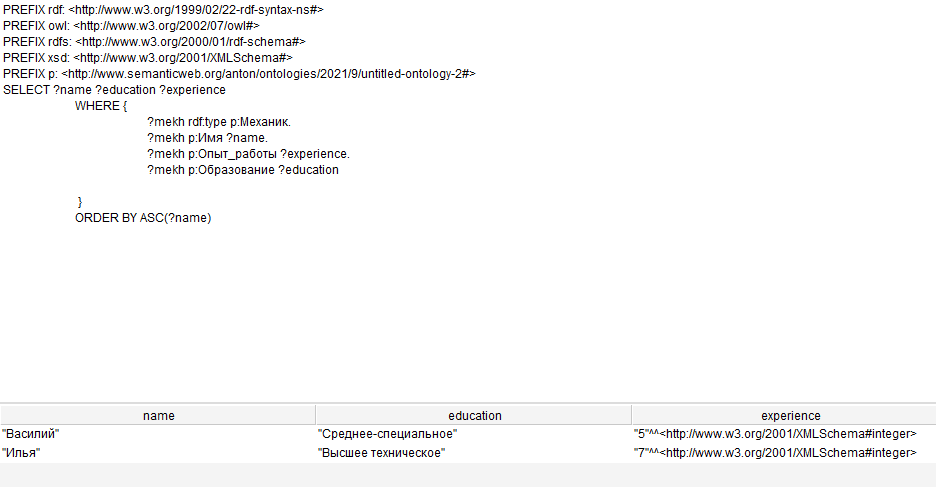

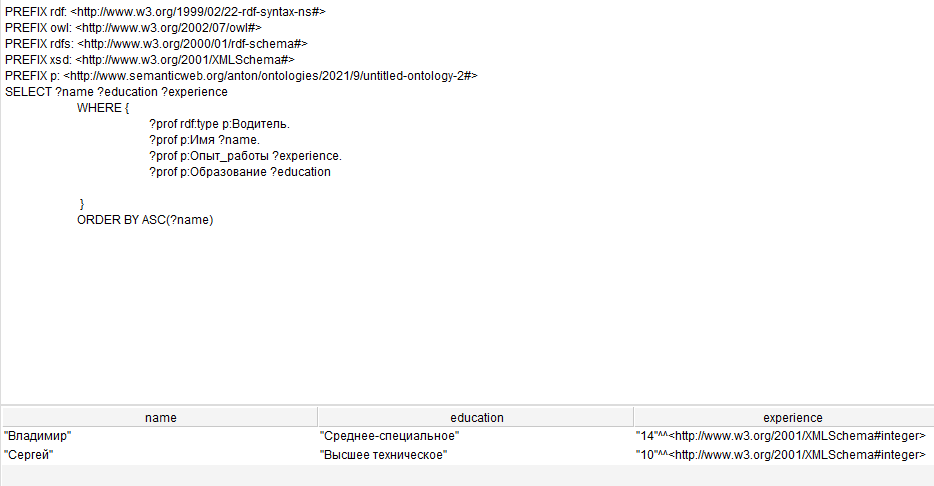

Аналогично для пилотов

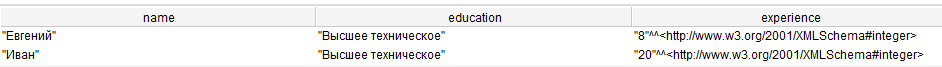

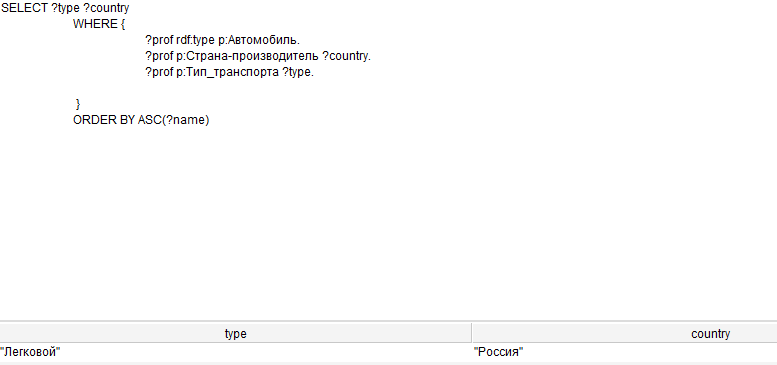![image.png]

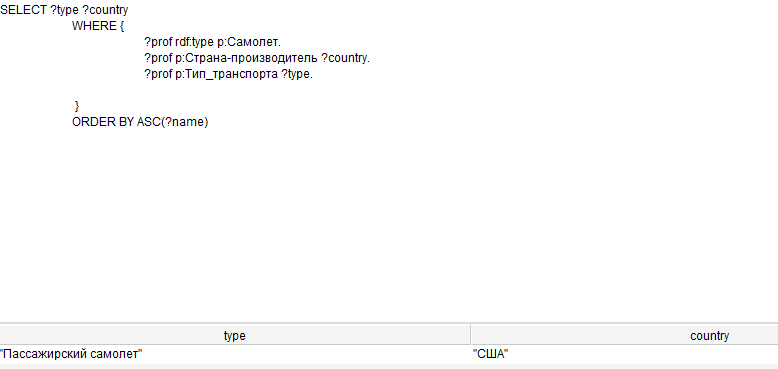

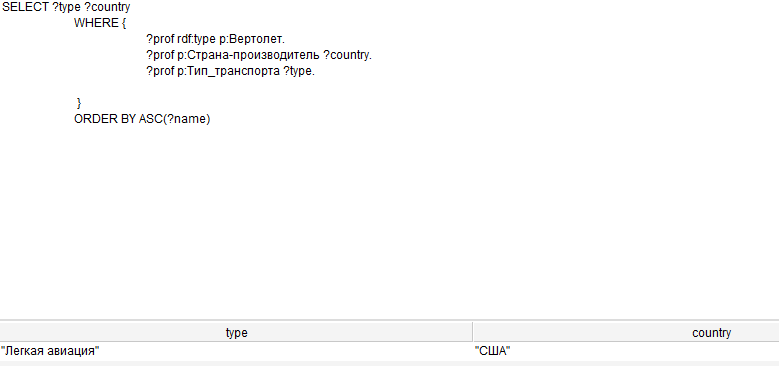

# Листинг файла

In [ ]:
file = open('База.owl', 'r')
str = file.readlines()
str

['<?xml version="1.0"?>\n',
 '<rdf:RDF xmlns="http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2"\n',
 '     xml:base="http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2"\n',
 '     xmlns:owl="http://www.w3.org/2002/07/owl#"\n',
 '     xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"\n',
 '     xmlns:xml="http://www.w3.org/XML/1998/namespace"\n',
 '     xmlns:xsd="http://www.w3.org/2001/XMLSchema#"\n',
 '     xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"\n',
 '     xmlns:untitled-ontology-2="http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#">\n',
 '    <owl:Ontology rdf:about="http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2"/>\n',
 '    \n',
 '\n',
 '\n',
 '    <!-- \n',
 '    ///////////////////////////////////////////////////////////////////////////////////////\n',
 '    //\n',
 '    // Object Properties\n',
 '    //\n',
 '    //////////////////////////////////////////////////////////////

# Задание: Сохранить проучившуюся базу знаний в виде файла owl/xml, подгрузить файл в колаб, подгрузить библиотеку в колаб. Сделать 10 запросов к базе данных из библиотеки, используя функции дискрипционной логики

In [ ]:
!pip install owlready2
!git clone https://github.com/dityas/Athene.git
!pip install git+https://github.com/rdflib/rdflib

fatal: destination path 'Athene' already exists and is not an empty directory.
  Cloning https://github.com/rdflib/rdflib to /tmp/pip-req-build-enp0wxs5
  Running command git clone -q https://github.com/rdflib/rdflib /tmp/pip-req-build-enp0wxs5


In [ ]:
import owlready2 as o
from Athene.reasoner.knowledgebase.axioms import *
from Athene.reasoner.common.constructors import *
import rdflib, rdflib.store

In [ ]:
ontology = o.get_ontology("База.owl")
ontology.load()
print(list(ontology.classes()))
print(list(ontology.individuals()))
print(list(ontology.object_properties()))
print(list(ontology.data_properties()))

[База.Водитель, База.Автомобиль, База.Грузовой_автомобиль, База.Механик, База.Вертолет, База.Самолет, База.Пилот, База.Специалист, База.Техника, База.Автотранспорт, База.ЛА]
[База.Boeing_737-800, База.Robinson_R44, База.Водитель_1, База.УАЗ-469, База.Водитель_2, База.ЗИЛ-131, База.Механик_1, База.Механик_2, База.Пилот_1, База.Пилот_2]
[База.Водит, База.Обслуживает, База.Пилотирует]
[База.Имя, База.Образование, База.Опыт_работы, База.Страна-производитель, База.Тип_транспорта]


In [ ]:
classes = list(ontology.classes())
individuals = list(ontology.individuals())

In [ ]:
print(TBoxAxiom(Subsumption(Concept(classes[0]), Concept(classes[7]))))
print(TBoxAxiom(Subsumption(Concept(classes[3]), Concept(classes[7]))))
print(TBoxAxiom(Subsumption(Concept(classes[6]), Concept(classes[7]))))

ALL База.Водитель ARE База.Специалист
ALL База.Механик ARE База.Специалист
ALL База.Пилот ARE База.Специалист


In [ ]:
print(TBoxAxiom(Subsumption(Concept(classes[9]), Concept(classes[8]))))
print(TBoxAxiom(Subsumption(Concept(classes[10]), Concept(classes[8]))))

ALL База.Автотранспорт ARE База.Техника
ALL База.ЛА ARE База.Техника


In [ ]:
print(TBoxAxiom(Subsumption(Concept(classes[1]), Concept(classes[9]))))
print(TBoxAxiom(Subsumption(Concept(classes[2]), Concept(classes[9]))))

ALL База.Автомобиль ARE База.Автотранспорт
ALL База.Грузовой_автомобиль ARE База.Автотранспорт


In [ ]:
print(TBoxAxiom(Subsumption(Concept(classes[4]), Concept(classes[10]))))
print(TBoxAxiom(Subsumption(Concept(classes[5]), Concept(classes[10]))))

ALL База.Вертолет ARE База.ЛА
ALL База.Самолет ARE База.ЛА


In [ ]:
print(ABoxAxiom(ClassAssertion(Concept(classes[0]),Concept(individuals[2]))))
print(ABoxAxiom(ClassAssertion(Concept(classes[0]),Concept(individuals[4]))))
print(TBoxAxiom(Subsumption(Or(Concept(individuals[2]), Concept(individuals[4])), Concept(classes[0]))))

ASSERT База.Водитель_1 IS A База.Водитель
ASSERT База.Водитель_2 IS A База.Водитель
ALL (База.Водитель_1 OR База.Водитель_2) ARE База.Водитель


In [ ]:
print(ABoxAxiom(ClassAssertion(Concept(classes[3]),Concept(individuals[6]))))
print(ABoxAxiom(ClassAssertion(Concept(classes[3]),Concept(individuals[7]))))
print(TBoxAxiom(Subsumption(Or(Concept(individuals[6]), Concept(individuals[7])), Concept(classes[3]))))

ASSERT База.Механик_1 IS A База.Механик
ASSERT База.Механик_2 IS A База.Механик
ALL (База.Механик_1 OR База.Механик_2) ARE База.Механик


In [ ]:
print(ABoxAxiom(ClassAssertion(Concept(classes[6]),Concept(individuals[8]))))
print(ABoxAxiom(ClassAssertion(Concept(classes[6]),Concept(individuals[9]))))
print(TBoxAxiom(Subsumption(Or(Concept(individuals[8]), Concept(individuals[9])), Concept(classes[6]))))

ASSERT База.Пилот_1 IS A База.Пилот
ASSERT База.Пилот_2 IS A База.Пилот
ALL (База.Пилот_1 OR База.Пилот_2) ARE База.Пилот


In [ ]:
print(ABoxAxiom(ClassAssertion(Concept(classes[5]),Concept(individuals[0]))))
print(ABoxAxiom(ClassAssertion(Concept(classes[4]),Concept(individuals[1]))))
print(ABoxAxiom(ClassAssertion(Concept(classes[1]),Concept(individuals[3]))))
print(ABoxAxiom(ClassAssertion(Concept(classes[2]),Concept(individuals[5]))))

ASSERT База.Boeing_737-800 IS A База.Самолет
ASSERT База.Robinson_R44 IS A База.Вертолет
ASSERT База.УАЗ-469 IS A База.Автомобиль
ASSERT База.ЗИЛ-131 IS A База.Грузовой_автомобиль


In [ ]:
g = rdflib.Graph()
g.parse("База.owl")

<Graph identifier=N25b54dfa2b94482aa59da8976104d1b8 (<class 'rdflib.graph.Graph'>)>

In [ ]:
query1 = "PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>"\
"PREFIX owl: <http://www.w3.org/2002/07/owl#>"\
"PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>"\
"PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>"\
"PREFIX p: <http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#>"\
"SELECT ?type ?country"\
        "WHERE { ?prof rdf:type p:Автомобиль."\
        "?prof p:Страна-производитель ?country."\
        "?prof p:Тип_транспорта ?type.}"\

In [ ]:
for i in g.query(query1):
  print(i.type)

Легковой


In [ ]:
query2 = "PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>"\
"PREFIX owl: <http://www.w3.org/2002/07/owl#>"\
"PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>"\
"PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>"\
"PREFIX p: <http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#>"\
"SELECT *"\
        "WHERE { ?m rdf:type p:Механик."\
        "?m p:Имя ?name."\
        "?m p:Опыт_работы ?experience." \
        "?m p:Образование ?education." \
        "}"

In [ ]:
vals = []
cols = ['Name', 'Individual', 'Experience', 'Education']

for i in g.query(query2):
  vals.append(i)

In [ ]:
import tabulate
print(tabulate.tabulate(vals, cols, tablefmt="grid"))

+---------+----------------------------------------------------------------------------------+--------------+---------------------+
| Name    | Individual                                                                       |   Experience | Education           |
+=========+==================================================================================+==============+=====================+
| Василий | http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#Механик_1 |            5 | Среднее-специальное |
+---------+----------------------------------------------------------------------------------+--------------+---------------------+
| Илья    | http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#Механик_2 |            7 | Высшее техническое  |
+---------+----------------------------------------------------------------------------------+--------------+---------------------+


In [ ]:
query3 = "PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>"\
"PREFIX owl: <http://www.w3.org/2002/07/owl#>"\
"PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>"\
"PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>"\
"PREFIX p: <http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#>"\
"SELECT *"\
        "WHERE { ?m rdf:type p:Пилот."\
        "?m p:Имя ?name."\
        "?m p:Опыт_работы ?experience." \
        "?m p:Образование ?education." \
        "}"

vals = []
cols = ['Name', 'Individual', 'Experience', 'Education']

for i in g.query(query3):
  vals.append(i)

print(tabulate.tabulate(vals, cols, tablefmt="grid"))

+---------+--------------------------------------------------------------------------------+--------------+--------------------+
| Name    | Individual                                                                     |   Experience | Education          |
+=========+================================================================================+==============+====================+
| Иван    | http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#Пилот_1 |           20 | Высшее техническое |
+---------+--------------------------------------------------------------------------------+--------------+--------------------+
| Евгений | http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#Пилот_2 |            8 | Высшее техническое |
+---------+--------------------------------------------------------------------------------+--------------+--------------------+


In [ ]:
query4 = "PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>"\
"PREFIX owl: <http://www.w3.org/2002/07/owl#>"\
"PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>"\
"PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>"\
"PREFIX p: <http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#>"\
"SELECT *"\
        "WHERE { ?m rdf:type p:Водитель."\
        "?m p:Имя ?name."\
        "?m p:Опыт_работы ?experience." \
        "?m p:Образование ?education." \
        "}"

vals = []
cols = ['Name', 'Individual', 'Experience', 'Education']

for i in g.query(query4):
  vals.append(i)

print(tabulate.tabulate(vals, cols, tablefmt="grid"))

+----------+-----------------------------------------------------------------------------------+--------------+---------------------+
| Name     | Individual                                                                        |   Experience | Education           |
+==========+===================================================================================+==============+=====================+
| Владимир | http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#Водитель_1 |           14 | Среднее-специальное |
+----------+-----------------------------------------------------------------------------------+--------------+---------------------+
| Сергей   | http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#Водитель_2 |           10 | Высшее техническое  |
+----------+-----------------------------------------------------------------------------------+--------------+---------------------+


In [ ]:
query5 = "PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>"\
"PREFIX owl: <http://www.w3.org/2002/07/owl#>"\
"PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>"\
"PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>"\
"PREFIX p: <http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#>"\
"SELECT *"\
        "WHERE { ?m rdf:type p:Автомобиль."\
        "?m p:Тип_транспорта ?a."\
        "?m p:Страна-производитель ?b." \
        "}"

vals = []
cols = ['Type', 'Individual', 'Country']

for i in g.query(query5):
  vals.append(i)

print(tabulate.tabulate(vals, cols, tablefmt="grid"))

+--------------------------------------------------------------------------------+--------------+-----------+
| Type                                                                           | Individual   | Country   |
+================================================================================+==============+===========+
| http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#УАЗ-469 | Россия       | Легковой  |
+--------------------------------------------------------------------------------+--------------+-----------+


In [ ]:
query6 = "PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>"\
"PREFIX owl: <http://www.w3.org/2002/07/owl#>"\
"PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>"\
"PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>"\
"PREFIX p: <http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#>"\
"SELECT *"\
        "WHERE { ?m rdf:type p:Грузовой_автомобиль."\
        "?m p:Тип_транспорта ?a."\
        "?m p:Страна-производитель ?b." \
        "}"

vals = []
cols = ['Type', 'Individual', 'Country']

for i in g.query(query6):
  vals.append(i)

print(tabulate.tabulate(vals, cols, tablefmt="grid"))

+--------------------------------------------------------------------------------+--------------+-----------+
| Type                                                                           | Individual   | Country   |
+================================================================================+==============+===========+
| http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#ЗИЛ-131 | Россия       | Грузовой  |
+--------------------------------------------------------------------------------+--------------+-----------+


In [ ]:
query7 = "PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>"\
"PREFIX owl: <http://www.w3.org/2002/07/owl#>"\
"PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>"\
"PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>"\
"PREFIX p: <http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#>"\
"SELECT *"\
        "WHERE { ?m rdf:type p:Вертолет."\
        "?m p:Тип_транспорта ?a."\
        "?m p:Страна-производитель ?b." \
        "}"

vals = []
cols = ['Type', 'Individual', 'Country']

for i in g.query(query7):
  vals.append(i)

print(tabulate.tabulate(vals, cols, tablefmt="grid"))

+-------------------------------------------------------------------------------------+--------------+----------------+
| Type                                                                                | Individual   | Country        |
+=====================================================================================+==============+================+
| http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#Robinson_R44 | США          | Легкая авиация |
+-------------------------------------------------------------------------------------+--------------+----------------+


In [ ]:
query8 = "PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>"\
"PREFIX owl: <http://www.w3.org/2002/07/owl#>"\
"PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>"\
"PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>"\
"PREFIX p: <http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#>"\
"SELECT *"\
        "WHERE { ?m rdf:type p:Самолет."\
        "?m p:Тип_транспорта ?a."\
        "?m p:Страна-производитель ?b." \
        "}"

vals = []
cols = ['Type', 'Individual', 'Country']

for i in g.query(query8):
  vals.append(i)

print(tabulate.tabulate(vals, cols, tablefmt="grid"))

+---------------------------------------------------------------------------------------+--------------+----------------------+
| Type                                                                                  | Individual   | Country              |
+=======================================================================================+==============+======================+
| http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#Boeing_737-800 | США          | Пассажирский самолет |
+---------------------------------------------------------------------------------------+--------------+----------------------+


In [ ]:
query9 = "PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>"\
"PREFIX owl: <http://www.w3.org/2002/07/owl#>"\
"PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>"\
"PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>"\
"PREFIX p: <http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#>"\
"SELECT *"\
        "WHERE {"\
        "?m p:Имя ?a."\
        "?m p:Образование ?b." \
        "}"

vals = []
cols = ['Name', 'Individual', 'Education']

for i in g.query(query9):
  vals.append(i)

print(tabulate.tabulate(vals, cols, tablefmt="grid"))

+-----------------------------------------------------------------------------------+---------------------+-------------+
| Name                                                                              | Individual          | Education   |
+===================================================================================+=====================+=============+
| http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#Водитель_1 | Среднее-специальное | Владимир    |
+-----------------------------------------------------------------------------------+---------------------+-------------+
| http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#Водитель_2 | Высшее техническое  | Сергей      |
+-----------------------------------------------------------------------------------+---------------------+-------------+
| http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#Механик_1  | Среднее-специальное | Василий     |
+-----------------------

In [ ]:
query10 = "PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>"\
"PREFIX owl: <http://www.w3.org/2002/07/owl#>"\
"PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>"\
"PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>"\
"PREFIX p: <http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#>"\
"SELECT *"\
        "WHERE {"\
        "?m p:Тип_транспорта ?a."\
        "}"

vals = []
cols = ['Name', 'Individual']

for i in g.query(query10):
  vals.append(i)

print(tabulate.tabulate(vals, cols, tablefmt="grid"))

+---------------------------------------------------------------------------------------+----------------------+
| Name                                                                                  | Individual           |
+=======================================================================================+======================+
| http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#Boeing_737-800 | Пассажирский самолет |
+---------------------------------------------------------------------------------------+----------------------+
| http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#Robinson_R44   | Легкая авиация       |
+---------------------------------------------------------------------------------------+----------------------+
| http://www.semanticweb.org/anton/ontologies/2021/9/untitled-ontology-2#ЗИЛ-131        | Грузовой             |
+---------------------------------------------------------------------------------------+-------